## Another cool API . . . but this time you're on your own 😓

Philadelphia, like many other cities makes a valiant effort to open source as much data as possible.

Using [this](https://www.opendataphilly.org/) website, go answer the following questions:
- What was the most common crime in Philadelphia between 2019 and now?

In [ ]:
#do your imports here
import pandas as pd
import requests
import json

In [ ]:
#call the API to pull in the data

response = requests.get("https://phl.carto.com/api/v2/sql?q=SELECT * FROM incidents_part1_part2 WHERE dispatch_date_time >= '2020-01-01'")                    

In [ ]:
#load the response's content

content = response.content

In [ ]:
#load the content into JSON

loaded = json.loads(content)

In [ ]:
#explore the JSON to see what the data looks like

loaded

In [ ]:
#make a dataframe from the JSON
crime_data = pd.DataFrame(loaded['rows'])

In [ ]:
crime_data.shape[0]
crime_data.columns

In [ ]:
#show the first few rows
crime_data.head()

In [ ]:
filtered_crime_data = crime_data[['dispatch_date', 'dispatch_time', 'text_general_code', 'point_x', 'point_y']]

In [ ]:
filtered_crime_data.head()

In [ ]:
condition_values = filtered_crime_data['text_general_code'].unique()
for value in condition_values:
    print(value)

In [ ]:
condition_values = filtered_crime_data['dispatch_date'].unique()
for value in condition_values:
    print(value)

In [ ]:
# Quick way to load crime data
filtered_crime_data.text_general_code.value_counts()

In [ ]:
#figure out the most common crime

crime_data.text_general_code.value_counts()

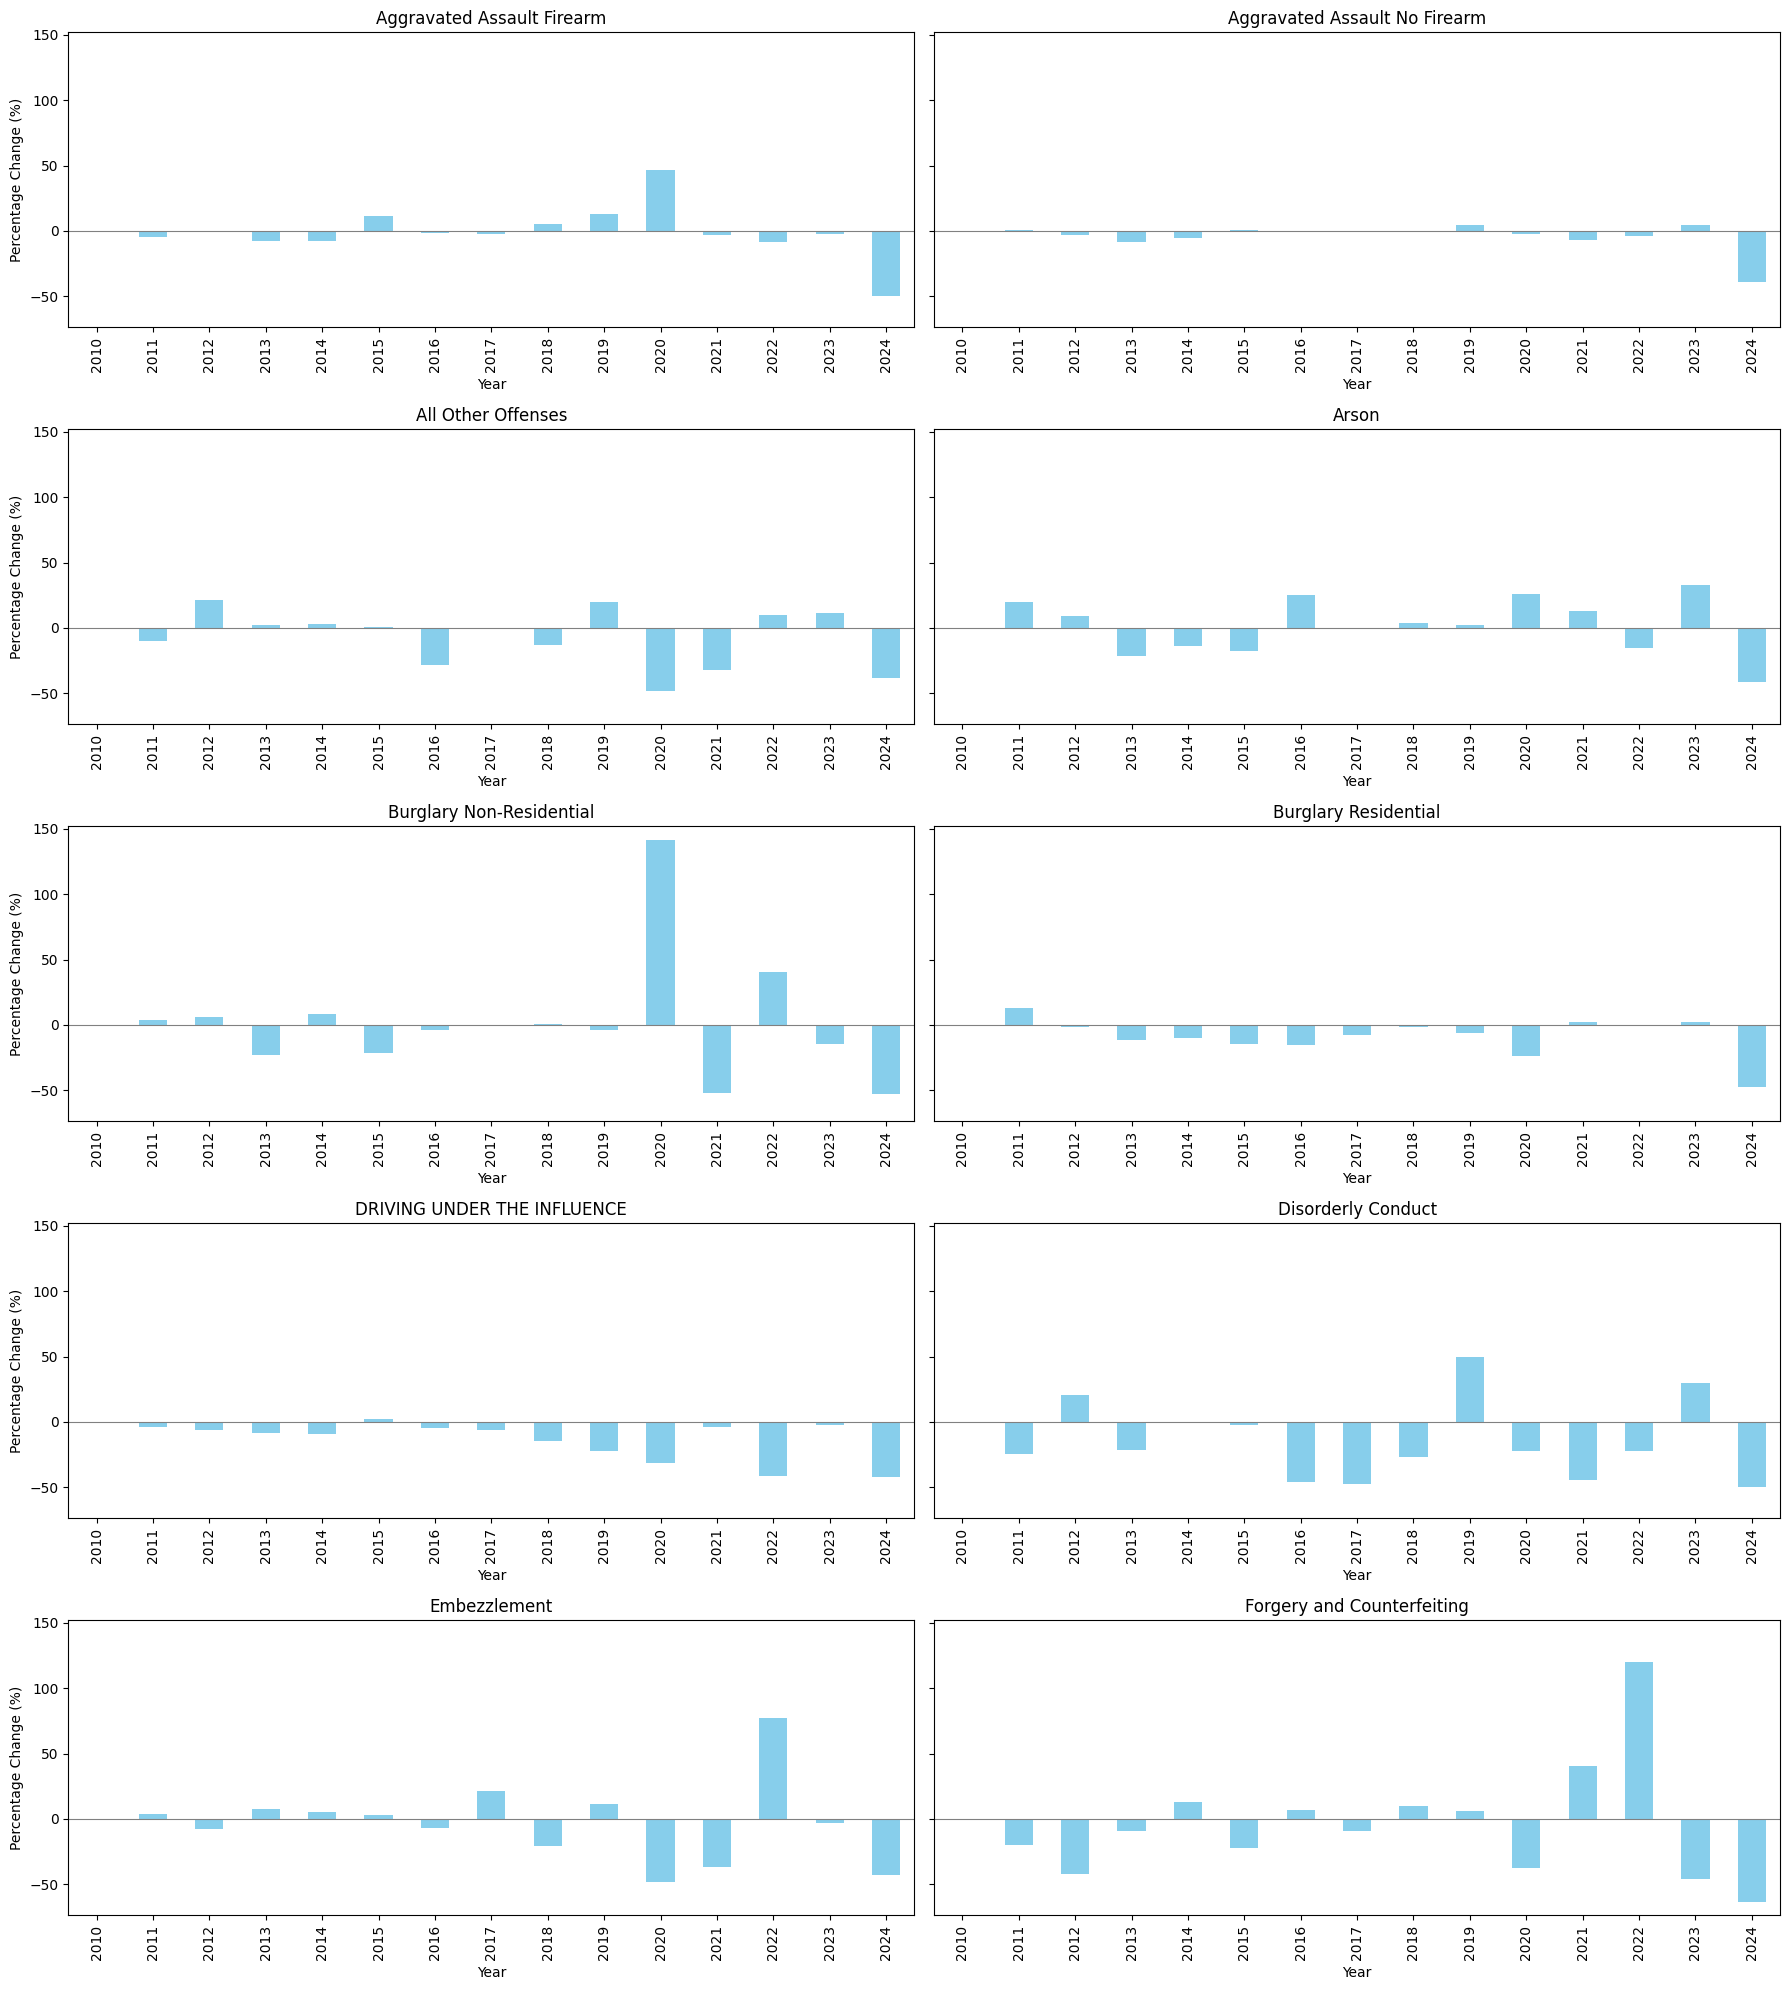

text_general_code,Aggravated Assault Firearm,Aggravated Assault No Firearm,All Other Offenses,Arson,Burglary Non-Residential,Burglary Residential,DRIVING UNDER THE INFLUENCE,Disorderly Conduct,Embezzlement,Forgery and Counterfeiting,...,Public Drunkenness,Rape,Receiving Stolen Property,Robbery Firearm,Robbery No Firearm,Theft from Vehicle,Thefts,Vagrancy/Loitering,Vandalism/Criminal Mischief,Weapon Violations
year,,,,,,,,,,,,,,,,,,,,,
2010,,,,,,,,,,,...,,,,,,,,,,
2011,-4.28%,0.85%,-9.91%,19.91%,3.67%,13.27%,-4.21%,-24.55%,3.78%,-19.65%,...,-3.86%,-9.44%,27.12%,1.76%,-4.24%,-5.31%,4.45%,-31.40%,-3.54%,-0.42%
2012,0.29%,-2.87%,21.39%,9.23%,5.95%,-1.50%,-6.40%,20.70%,-8.07%,-42.14%,...,-24.90%,7.19%,-13.33%,-5.50%,-0.46%,-14.45%,3.90%,-32.13%,-2.37%,-7.66%
2013,-7.88%,-8.35%,2.21%,-21.28%,-23.06%,-11.40%,-8.69%,-21.29%,7.93%,-9.43%,...,-5.08%,43.46%,-4.62%,-8.50%,-3.27%,-4.41%,-3.14%,-51.96%,-11.33%,-5.82%
2014,-7.61%,-5.06%,3.04%,-13.95%,8.46%,-9.77%,-9.33%,-0.90%,4.99%,12.92%,...,27.89%,-5.06%,-19.35%,-2.03%,-11.81%,-0.20%,0.49%,112.02%,0.67%,0.21%
2015,11.09%,0.92%,0.69%,-17.46%,-21.81%,-14.83%,1.93%,-2.53%,3.00%,-22.14%,...,16.74%,9.60%,-30.00%,-4.58%,-1.35%,-2.32%,-2.68%,139.91%,3.05%,-6.86%
2016,-1.26%,-1.06%,-28.29%,25.08%,-4.24%,-15.58%,-4.53%,-45.91%,-7.04%,6.64%,...,-26.98%,-6.59%,34.29%,-7.11%,-8.70%,7.78%,-1.96%,-98.49%,2.41%,42.83%
2017,-2.25%,-0.26%,-0.73%,0.00%,-0.07%,-7.73%,-6.46%,-47.48%,21.41%,-9.33%,...,-55.56%,-8.57%,-34.04%,-8.81%,1.16%,-4.12%,-0.29%,18.75%,-4.90%,11.50%
2018,5.42%,-0.39%,-13.09%,4.11%,0.64%,-1.74%,-14.66%,-26.55%,-21.08%,9.80%,...,-48.84%,-5.70%,-12.90%,-11.49%,-13.01%,1.89%,2.17%,-47.37%,-2.11%,4.01%


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming filtered_crime_data is already available and processed as before

# Step 1: Group the data by year and crime type and count occurrences
crime_counts_per_year = filtered_crime_data.groupby(['year', 'text_general_code']).size().unstack(fill_value=0)

# Step 2: Calculate the year-over-year percentage change for each crime type
percentage_change = crime_counts_per_year.pct_change() * 100

# Step 3: Format the percentage change values
formatted_percentage_change = percentage_change.map(lambda x: f"{x:.2f}%" if not pd.isnull(x) else "")

# Plot the data for each crime type
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20), sharey=True)
axes = axes.flatten()

for i, crime in enumerate(percentage_change.columns):
    if i < len(axes):
        percentage_change[crime].plot(kind='bar', ax=axes[i], color='skyblue', title=crime)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage Change (%)')
        axes[i].axhline(0, color='gray', linewidth=0.8)

plt.tight_layout()
plt.show()

# Display the formatted percentage change values
formatted_percentage_change


In [57]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   APIs - Continued.ipynb
	modified:   ../Pandas - Part 1 (importing data, summary stats)/Pandas Basics - Pt. 1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Untitled.ipynb
	Untitled1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [54]:
! git commit -m "Charted some crime data of Philadelphia"

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   APIs - Continued.ipynb
	modified:   ../Pandas - Part 1 (importing data, summary stats)/Pandas Basics - Pt. 1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Untitled.ipynb
	Untitled1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [58]:
! git push origin master

Everything up-to-date


In [59]:
! git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   APIs - Continued.ipynb
	modified:   ../Pandas - Part 1 (importing data, summary stats)/Pandas Basics - Pt. 1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Untitled.ipynb
	Untitled1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [60]:
! git add APIs\ -\ Continued.ipynb ../Pandas\ -\ Part\ 1\ \(importing\ data,\ summary\ stats\)/Pandas\ Basics\ -\ Pt.\ 1.ipynb


In [62]:
! git status


On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   APIs - Continued.ipynb
	modified:   ../Pandas - Part 1 (importing data, summary stats)/Pandas Basics - Pt. 1.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   APIs - Continued.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Untitled.ipynb
	Untitled1.ipynb



In [63]:
! git add APIs\ -\ Continued.ipynb

In [64]:
! git status


On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   APIs - Continued.ipynb
	modified:   ../Pandas - Part 1 (importing data, summary stats)/Pandas Basics - Pt. 1.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Untitled.ipynb
	Untitled1.ipynb



In [65]:
! git commit -m "Charted some crime data of Philadelphia"

[master 4b4d827] Charted some crime data of Philadelphia
 Committer: Peter <peter@Zipcoders-MacBook-Pro-6.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly:

    git config --global user.name "Your Name"
    git config --global user.email you@example.com

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 2 files changed, 963 insertions(+), 16402 deletions(-)
 rewrite Getting Data - Part 2/APIs - Continued.ipynb (97%)


In [66]:
! git push origin master

Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 8 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 105.04 KiB | 15.00 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/PeterVanBeever/DataEngineering.Labs.Libraries.git
   b3a99c6..4b4d827  master -> master
